In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier

In [ ]:
# Step 2: Load Dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
temp_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
temp_model.fit(X, y_encoded)
feat_importance = pd.Series(temp_model.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features = feat_importance[:5].index.tolist()
X = X[selected_features]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:08:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "HistGradientBoost": HistGradientBoostingClassifier(),
    "RidgeClassifier": RidgeClassifier()
}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"\n{name} Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9864, Precision: 0.9869, Recall: 0.9864, F1 Score: 0.9863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 5
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from sco

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('xgb', models['XGBoost']),
        ('lgb', models['LightGBM']),
        ('cat', models['CatBoost'])
    ],
    voting='soft'
)
ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_test)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:10:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000115 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 5
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] [

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"\n{name} Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:47:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Accuracy: 0.9864, Precision: 0.9869, Recall: 0.9864, F1 Score: 0.9863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 5
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from sco

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
acc = accuracy_score(y_test, y_pred_ens)
precision = precision_score(y_test, y_pred_ens, average='weighted')
recall = recall_score(y_test, y_pred_ens, average='weighted')
f1 = f1_score(y_test, y_pred_ens, average='weighted')
print("\nEnsemble Model Evaluation:")
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred_ens)))



Ensemble Model Evaluation:
Accuracy: 0.9886, Precision: 0.9893, Recall: 0.9886, F1 Score: 0.9886

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.96      1.00      0.98        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       0.95      1.00      0.97        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon

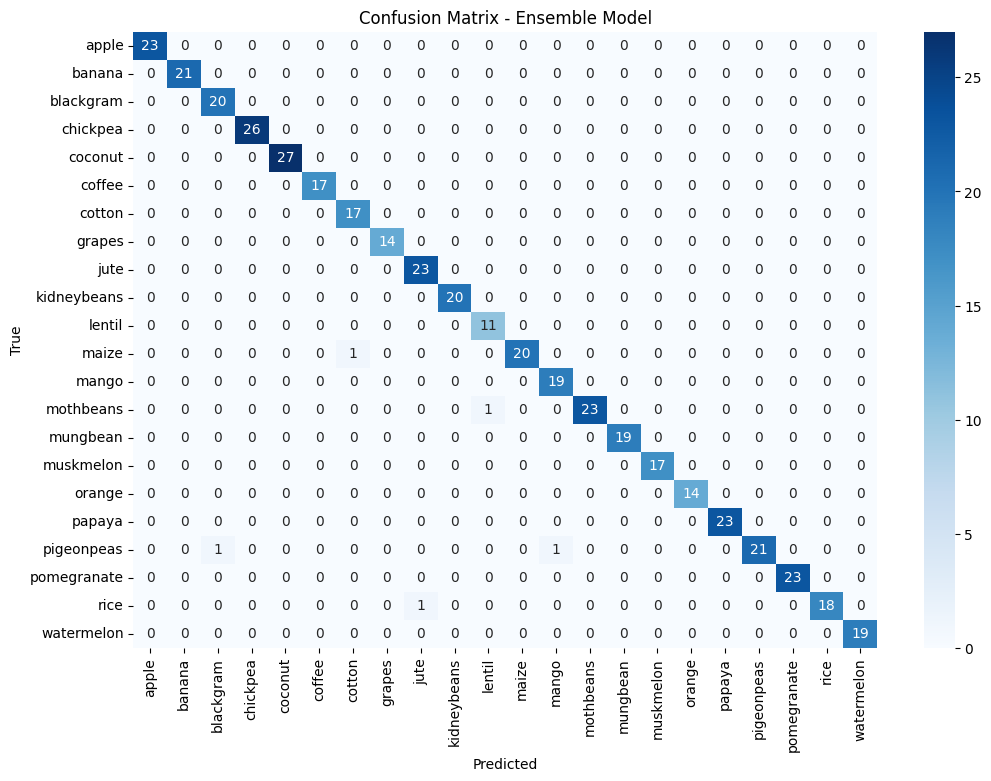

In [ ]:
conf_matrix = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred_ens))
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Ensemble Model')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize


In [ ]:
# Binarize the output for multi-class ROC
y_train_bin = label_binarize(y_train, classes=np.unique(y_encoded))
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))
n_classes = y_test_bin.shape[1]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier


In [ ]:
ensemble_ovr = OneVsRestClassifier(
    VotingClassifier(
        estimators=[
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
            ('lgb', LGBMClassifier()),
            ('cat', CatBoostClassifier(verbose=0))
        ],
        voting='soft'
    )
)


In [ ]:
# Train individual OneVsRest models using classifiers that support predict_proba
ovr_model = OneVsRestClassifier(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
ovr_model.fit(X_train, y_train_bin)
y_score = ovr_model.predict_proba(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:25:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])


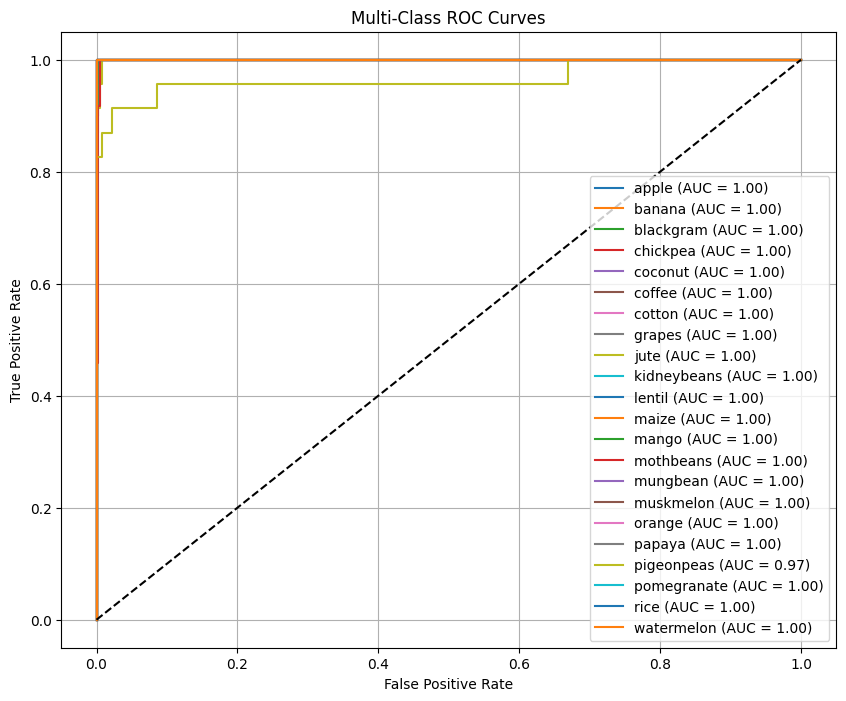

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curves')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
# Store metrics for all models
model_metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    f1 = f1_score(y_test, preds, average='weighted')

    model_metrics.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Add ensemble metrics
ensemble_metrics = {
    'Model': 'Ensemble',
    'Accuracy': accuracy_score(y_test, y_pred_ens),
    'Precision': precision_score(y_test, y_pred_ens, average='weighted'),
    'Recall': recall_score(y_test, y_pred_ens, average='weighted'),
    'F1 Score': f1_score(y_test, y_pred_ens, average='weighted')
}
model_metrics.append(ensemble_metrics)

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)
print("\nModel Evaluation Summary:")
print(metrics_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:51:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 828
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 5
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.169004
[LightGBM] [Info] Start training from score -3.182610
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.054228
[LightGBM] [Info] Start training from score -3.018722
[LightGBM] [Info] Start training from score -3.129264
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.984433
[LightGBM] [Info] Start training from score -3.103621
[LightGBM] [Info] Start training from score -3.078620
[LightGBM] [

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-38-01d163d9b811>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='viridis')


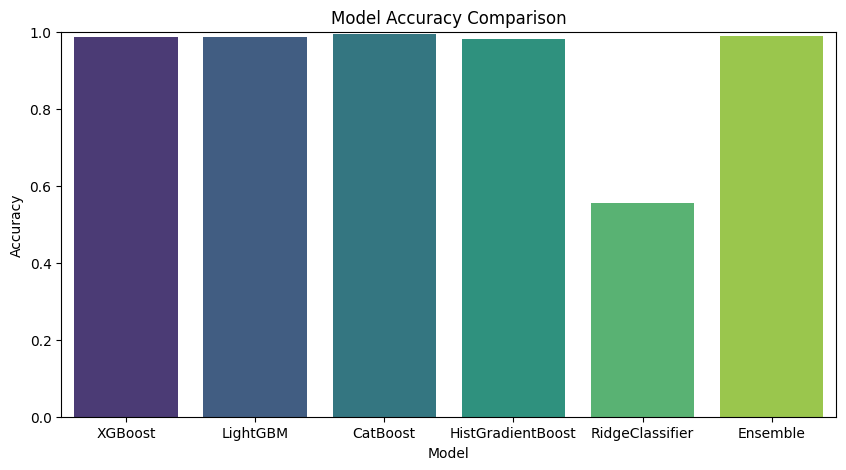

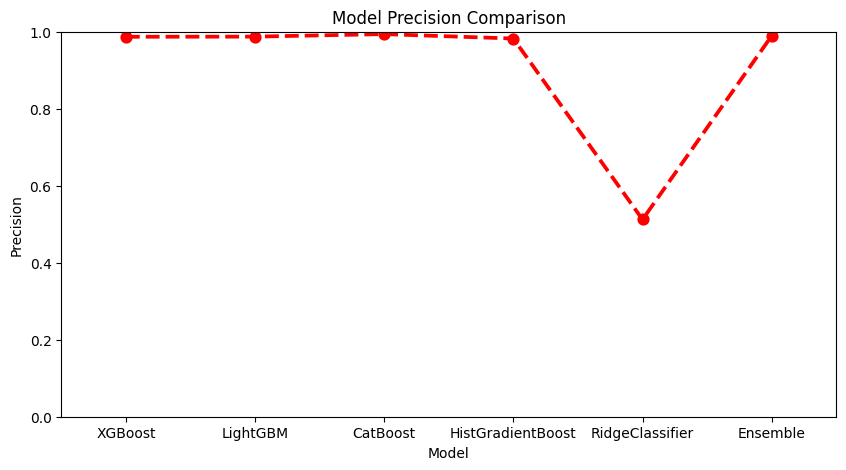

<ipython-input-38-01d163d9b811>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metrics_df, x='Model', y='Recall', palette='magma')


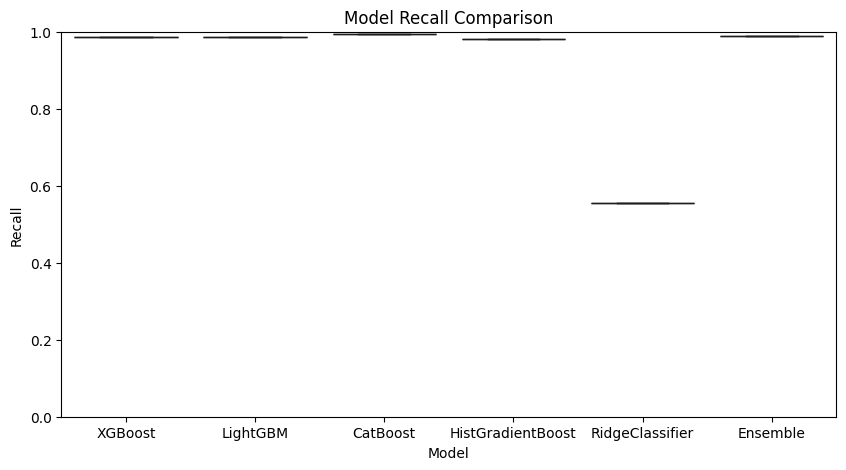

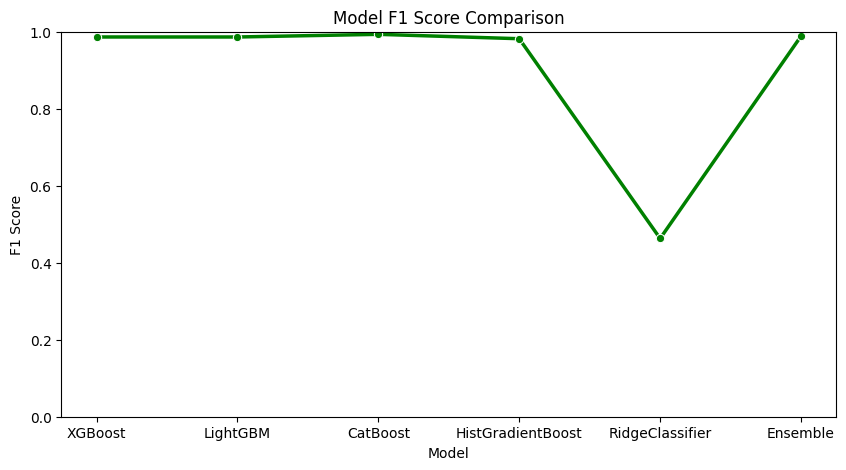

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Accuracy Comparison – **Barplot (keep as is for clarity)**
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

# Plot 2: Precision Comparison – **Pointplot** for a cleaner comparison
plt.figure(figsize=(10, 5))
sns.pointplot(data=metrics_df, x='Model', y='Precision', color='red', markers='o', linestyles='--')
plt.title('Model Precision Comparison')
plt.ylim(0, 1)
plt.show()

# Plot 3: Recall Comparison – **Boxplot** to see distribution if multiple values exist per model
plt.figure(figsize=(10, 5))
sns.boxplot(data=metrics_df, x='Model', y='Recall', palette='magma')
plt.title('Model Recall Comparison')
plt.ylim(0, 1)
plt.show()

# Plot 4: F1 Score Comparison – **Lineplot** (good if models have ordering or trends)
plt.figure(figsize=(10, 5))
sns.lineplot(data=metrics_df, x='Model', y='F1 Score', marker='o', linewidth=2.5, color='green')
plt.title('Model F1 Score Comparison')
plt.ylim(0, 1)
plt.show()


In [ ]:
# Step 7: Save Ensemble Model
with open('crop_ensemble_model.pkl', 'wb') as f:
    pickle.dump((ensemble, le, selected_features), f)

In [ ]:
# Step 8: Description for Top 5 Crops (Example)
print("\nTop 5 Important Crops and Ideal Values:")
crop_descriptions = {
    "rice": "Ideal in areas with high rainfall and nitrogen content. pH should be between 6.5 and 7.5.",
    "wheat": "Prefers cooler climate, moderate nitrogen and phosphorus. pH around 6.0 - 7.0.",
    "maize": "Needs more potassium and temperature between 21°C to 27°C. pH 5.5 - 7.0.",
    "cotton": "Thrives in black soil with moderate nitrogen and low rainfall. pH 6.0 - 7.5.",
    "sugarcane": "Requires very high potassium and phosphorous. Grows well in pH 6.5 - 7.5."
}


Top 5 Important Crops and Ideal Values:


In [ ]:
for crop, desc in crop_descriptions.items():
    print(f"{crop.title()}: {desc}")

Rice: Ideal in areas with high rainfall and nitrogen content. pH should be between 6.5 and 7.5.
Wheat: Prefers cooler climate, moderate nitrogen and phosphorus. pH around 6.0 - 7.0.
Maize: Needs more potassium and temperature between 21°C to 27°C. pH 5.5 - 7.0.
Cotton: Thrives in black soil with moderate nitrogen and low rainfall. pH 6.0 - 7.5.
Sugarcane: Requires very high potassium and phosphorous. Grows well in pH 6.5 - 7.5.


In [ ]:
print("\nEnter the following details to get a crop recommendation:")
user_input = []
sample_input = {
    'N': 90.0,
    'P': 42.0,
    'K': 43.0,
    'temperature': 24.0,
    'humidity': 80.0
}
print("Sample Input:")
for k, v in sample_input.items():
    print(f"{k}: {v}")

for feat in selected_features:
    val = float(input(f"Enter value for {feat}: "))
    user_input.append(val)


Enter the following details to get a crop recommendation:
Sample Input:
N: 90.0
P: 42.0
K: 43.0
temperature: 24.0
humidity: 80.0
Enter value for P: 42.0
Enter value for K: 43.0
Enter value for humidity: 80.0
Enter value for rainfall: 120.0
Enter value for N: 90.0


In [ ]:
# Load model and predict
with open('crop_ensemble_model.pkl', 'rb') as f:
    model, le, selected_features = pickle.load(f)

input_data = np.array([user_input])
prediction = model.predict(input_data)
predicted_crop = le.inverse_transform(prediction)
print(f"\nRecommended Crop: {predicted_crop[0]}")


Recommended Crop: jute


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
